# Deep Learning-Hardcoding backpropogation in Numpy and training on MNIST dataset

In this project, am L-layered deep neural network is implemented by hardcoding and developing the equations of backpropogation in Numpy. The network so developed is then trained on the MNIST dataset. 

The MNIST dataset contains scanned images of handwritten digits, along with their correct classification labels (between 0-9).

## Data Preparation

In [1]:
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import sklearn
import sklearn.datasets
import scipy
from PIL import Image
from scipy import ndimage


%matplotlib inline

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


The MNIST dataset used here is 'mnist.pkl.gz' which is divided into training, validation and test data. The following function load_data() unpacks the file and extracts the training, validation and test data.

In [2]:
def load_data():
    f = gzip.open('mnist.pkl.gz', 'rb')
    f.seek(0)
    training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    return (training_data, validation_data, test_data)

Let's see how the data looks:

In [3]:
training_data, validation_data, test_data = load_data()

In [4]:
training_data

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([5, 0, 4, ..., 8, 4, 8]))

In [5]:
# shape of data
print(training_data[0].shape)
print(training_data[1].shape)

(50000, 784)
(50000,)


In [6]:
print("The feature dataset is:" + str(training_data[0]))
print("The target dataset is:" + str(training_data[1]))
print("The number of examples in the training dataset is:" + str(len(training_data[0])))
print("The number of points in a single input is:" + str(len(training_data[0][1])))

The feature dataset is:[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
The target dataset is:[5 0 4 ... 8 4 8]
The number of examples in the training dataset is:50000
The number of points in a single input is:784


The target variable is now converted to a one hot matrix. The function one_hot is used to convert the target dataset to one hot encoding.

In [7]:
def one_hot(j):
    # input is the target dataset of shape (m,) where m is the number of data points
    # returns a 2 dimensional array of shape (10, m) where each target value is converted to a one hot encoding
   
    n = j.shape[0]
    new_array = np.zeros((10, n))
    index = 0
    for res in j:
        new_array[res][index] = 1.0
        index = index + 1
    return new_array

In [8]:
data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(data.shape)
one_hot(data)

(10,)


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

The following function data_wrapper() will convert the dataset into the desired shape and also convert the ground truth labels to one_hot matrix.

In [9]:
def data_wrapper():
    tr_d, va_d, te_d = load_data()
    
    training_inputs = np.array(tr_d[0][:]).T
    training_results = np.array(tr_d[1][:])
    train_set_y = one_hot(training_results)
    
    validation_inputs = np.array(va_d[0][:]).T
    validation_results = np.array(va_d[1][:])
    validation_set_y = one_hot(validation_results)
    
    test_inputs = np.array(te_d[0][:]).T
    test_results = np.array(te_d[1][:])
    test_set_y = one_hot(test_results)
    
    return (training_inputs, train_set_y, test_inputs, test_set_y)

In [10]:
train_set_x, train_set_y, test_set_x, test_set_y = data_wrapper()

In [11]:
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x shape: (784, 50000)
train_set_y shape: (10, 50000)
test_set_x shape: (784, 10000)
test_set_y shape: (10, 10000)


As can be seen, data_wrapper has converted the training and validation data into numpy array of desired shapes. Let's convert the actual labels into a dataframe to see if the one hot conversions are correct.

In [12]:
y = pd.DataFrame(train_set_y)

In [13]:
print("The target dataset is:" + str(training_data[1]))
print("The one hot encoding dataset is:")
y

The target dataset is:[5 0 4 ... 8 4 8]
The one hot encoding dataset is:


0      1      2      3      4      5      6      7      8      9      \
0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    1.0    0.0    0.0    1.0    0.0    1.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
4    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
5    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
8    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   

   ...    49990  49991  49992  49993  49994  49995  49996  49997  49998  49999  
0  ...      0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0  
1  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2  ...      0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0  
3  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4  ...      0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    1.0    0.0  
5  ...      0.0    1.0    1.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0  
6  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
7  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
8  ...      1.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    1.0  
9  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[10 rows x 50000 columns]

Visualising the data.

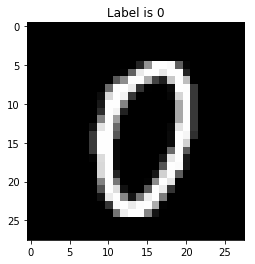

In [14]:
index  = 1000
k = train_set_x[:,index]
k = k.reshape((28, 28))
plt.title('Label is {label}'.format(label= training_data[1][index]))
plt.imshow(k, cmap='gray')

# Feedforward

### sigmoid
This is one of the activation functions. It takes the cumulative input to the layer, the matrix **Z**, as the input. Upon application of the **`sigmoid`** function, the output matrix **H** is calculated. Also, **Z** is stored as the variable **sigmoid_memory** since it will be later used in backpropagation.

In [15]:
def sigmoid(Z):
    
    # Z is numpy array of shape (n, m) where n is number of neurons in the layer and m is the number of samples 
    # sigmoid_memory is stored as it is used later on in backpropagation
    
    H = 1/(1+np.exp(-Z))
    sigmoid_memory = Z
    
    return H, sigmoid_memory

In [16]:
Z = np.arange(8).reshape(4,2)
print ("sigmoid(Z) = " + str(sigmoid(Z)))

sigmoid(Z) = (array([[0.5       , 0.73105858],
       [0.88079708, 0.95257413],
       [0.98201379, 0.99330715],
       [0.99752738, 0.99908895]]), array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]]))


### relu
This is one of the activation functions. It takes the cumulative input to the layer, matrix **Z** as the input. Upon application of the **`relu`** function, matrix **H** which is the output matrix is calculated. Also, **Z** is stored as **relu_memory** which will be later used in backpropagation.

In [17]:
def relu(Z):
    # Z is numpy array of shape (n, m) where n is number of neurons in the layer and m is the number of samples 
    # relu_memory is stored as it is used later on in backpropagation
    
    H = np.maximum(0,Z)
    
    assert(H.shape == Z.shape)
    
    relu_memory = Z 
    return H, relu_memory

In [18]:
Z = np.array([1, 3, -1, -4, -5, 7, 9, 18]).reshape(4,2)
print ("relu(Z) = " + str(relu(Z)))

relu(Z) = (array([[ 1,  3],
       [ 0,  0],
       [ 0,  7],
       [ 9, 18]]), array([[ 1,  3],
       [-1, -4],
       [-5,  7],
       [ 9, 18]]))


### softmax
This is the activation of the last layer. It takes the cumulative input to the layer, matrix **Z** as the input. Upon application of the **`softmax`** function, the output matrix **H** is calculated. Also, **Z** is stored as **softmax_memory** which will be later used in backpropagation. 

In [19]:
def softmax(Z):
    # Z is numpy array of shape (n, m) where n is number of neurons in the layer and m is the number of samples 
    # softmax_memory is stored as it is used later on in backpropagation
   
    Z_exp = np.exp(Z)

    Z_sum = np.sum(Z_exp,axis = 0, keepdims = True)
    
    H = Z_exp/Z_sum  #normalising step
    softmax_memory = Z
    
    return H, softmax_memory

In [20]:
Z = np.array([[11,19,10], [12, 21, 23]])

In [21]:
#Z = np.array(np.arange(30)).reshape(10,3)
H, softmax_memory = softmax(Z)
print(H)
print(softmax_memory)

[[2.68941421e-01 1.19202922e-01 2.26032430e-06]
 [7.31058579e-01 8.80797078e-01 9.99997740e-01]]
[[11 19 10]
 [12 21 23]]


### initialize_parameters
Now, creating a function **`initialize_parameters`** which initializes the weights and biases of the various layers. One way to initialise is to set all the parameters to 0. This is not a considered a good strategy as all the neurons will behave the same way and it'll defeat the purpose of deep networks. Hence, we initialize the weights randomly to very small values but not zeros. The biases are initialized to 0.  

The inputs to this function is a list named `dimensions`. The length of the list is the number layers in the network + 1 (the plus one is for the input layer, rest are hidden + output). The first element of this list is the dimensionality or length of the input (784 for the MNIST dataset). The rest of the list contains the number of neurons in the corresponding (hidden and output) layers.

In [22]:
def initialize_parameters(dimensions):

    np.random.seed(2)
    parameters = {}
    L = len(dimensions)            # number of layers in the network + 1

    for l in range(1, L): 
        parameters['W' + str(l)] = np.random.randn(dimensions[l], dimensions[l-1]) * 0.1
        parameters['b' + str(l)] = np.zeros((dimensions[l], 1)) 
        
        assert(parameters['W' + str(l)].shape == (dimensions[l], dimensions[l-1]))
        assert(parameters['b' + str(l)].shape == (dimensions[l], 1))

        
    return parameters

In [23]:
dimensions  = [784, 3,7,10]
parameters = initialize_parameters(dimensions)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
# print("W3 = " + str(parameters["W3"]))
# print("b3 = " + str(parameters["b3"]))

W1 = [[-0.04167578 -0.00562668 -0.21361961 ... -0.06168445  0.03213358
  -0.09464469]
 [-0.05301394 -0.1259207   0.16775441 ... -0.03284246 -0.05623108
   0.01179136]
 [ 0.07386378 -0.15872956  0.01532001 ... -0.08428557  0.10040469
   0.00545832]]
b1 = [[0.]
 [0.]
 [0.]]
W2 = [[ 0.06650944 -0.19626047  0.2112715 ]
 [-0.28074571 -0.13967752  0.02641189]
 [ 0.10925169  0.06646016  0.08565535]
 [-0.11058228  0.03715795  0.13440124]
 [-0.16421272 -0.1153127   0.02013163]
 [ 0.13985659  0.07228733 -0.10717236]
 [-0.05673344 -0.03663499 -0.15460347]]
b2 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


### layer_forward

The function **`layer_forward`** implements the forward propagation for a certain layer 'l'. It calculates the cumulative input into the layer **Z** and uses it to calculate the output of the layer **H**. It takes **H_prev, W, b and the activation function** as inputs and stores the **linear_memory, activation_memory** in the variable **memory** which will be used later in backpropagation. 

In [24]:
def layer_forward(H_prev, W, b, activation = 'relu'):

    # H_prev is of shape (size of previous layer, number of examples)
    # W is weights matrix of shape (size of current layer, size of previous layer)
    # b is bias vector of shape (size of the current layer, 1)
    # activation is the activation to be used for forward propagation : "softmax", "relu", "sigmoid"

    # H is the output of the activation function 
    # memory is a python dictionary containing "linear_memory" and "activation_memory"
    
    if activation == "sigmoid":
        Z = np.dot(W,H_prev)+b
        linear_memory = (H_prev, W, b)
        H, activation_memory = sigmoid(Z)
 
    elif activation == "softmax":
        Z = np.dot(W,H_prev)+b
        linear_memory = (H_prev, W, b)
        H, activation_memory = softmax(Z)
    
    elif activation == "relu":
        Z = np.dot(W,H_prev)+b
        linear_memory = (H_prev, W, b)
        H, activation_memory = relu(Z)
        
    assert (H.shape == (W.shape[0], H_prev.shape[1]))
    memory = (linear_memory, activation_memory)

    return H, memory

### L_layer_forward
**`L_layer_forward`** performs one forward pass through the whole network for all the training samples. **`layer_forward`** created aboveis used here to perform the feedforward for layers 1 to 'L-1' in the for loop with the activation **`relu`**. The last layer having a different activation **`softmax`** is calculated outside the loop. **memory** is appended to **memories** for all the layers. These will be used in the backward order during backpropagation.

In [29]:
def L_layer_forward(X, parameters):


    memories = []
    H = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
   
    for l in range(1, L):
        H_prev = H#write your code here 
        
        H, memory = layer_forward(H_prev, parameters['W'+str(l)], parameters['b'+str(l)])
        
        memories.append(memory)
    


    HL, memory = layer_forward(H, parameters['W'+str(L)], parameters['b'+str(L)], activation='softmax')
    
    memories.append(memory)

    assert(HL.shape == (10, X.shape[1]))
            
    return HL, memories

# Loss

### compute_loss
The next step is to compute the loss function after every forward pass to keep checking whether it is decreasing with training. **`compute_loss`** here calculates the cross-entropy loss.

In [31]:
def compute_loss(HL, Y):


    # HL is probability matrix of shape (10, number of examples)
    # Y is true "label" vector shape (10, number of examples)

    # loss is the cross-entropy loss

    m = Y.shape[1]

    loss = -(1./m)*np.sum(np.multiply(Y,np.log(HL)))
    
    loss = np.squeeze(loss)      
    assert(loss.shape == ())
    
    return loss

# Backpropagation
Starting with sigmoid backpropogation

### sigmoid-backward
Earlier we had created **`sigmoid`** function that calculated the activation for forward propagation. Now, we need the activation backward, which helps in calculating **dZ** from **dH**. It takes input **dH** and **sigmoid_memory** as input. **sigmoid_memory** is the **Z** which we had calculated during forward propagation.

In [33]:
def sigmoid_backward(dH, sigmoid_memory):
    
   
    # dH is gradient of the sigmoid activated activation of shape same as H or Z in the same layer    
    # sigmoid_memory is the memory stored in the sigmoid(Z) calculation
    
    Z = sigmoid_memory
    
    H = 1/(1+np.exp(-Z))
    dZ = dH * H * (1-H)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

### relu-backward
We had created **`relu`** function that calculated the activation for forward propagation. Now, we need the activation backward, which helps in calculating **dZ** from **dH**. It takes input **dH** and **relu_memory** as input. **relu_memory** is the **Z** which we calculated uring forward propagation. 

In [34]:
def relu_backward(dH, relu_memory):
    

    # dH is gradient of the relu activated activation of shape same as H or Z in the same layer    
    # relu_memory is the memory stored in the sigmoid(Z) calculation
    
    Z = relu_memory
    dZ = np.array(dH, copy=True) # dZ will be the same as dA wherever the elements of A weren't 0
    
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

### layer_backward

**`layer_backward`** is a complimentary function of **`layer_forward`**. Like **`layer_forward`** calculates **H** using **W**, **H_prev** and **b**, **`layer_backward`** uses **dH** to calculate **dW**, **dH_prev** and **db**. 

In [1]:
def layer_backward(dH, memory, activation = 'relu'):
    

    linear_memory, activation_memory = memory
    
    if activation == "relu":
        dZ = relu_backward(dH,activation_memory)
        H_prev, W, b = linear_memory
        m = H_prev.shape[1]
        dW = (1./m)*np.dot(dZ, H_prev.T)
        db = (1./m)*np.sum(dZ, axis=1, keepdims=True)
        dH_prev = np.dot(W.T,dZ)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dH,activation_memory)
        H_prev, W, b = linear_memory
        m = H_prev.shape[1]
        dW = (1./m)*np.dot(dZ, H_prev.T)
        db = (1./m)*np.sum(dZ, axis=1, keepdims=True)
        dH_prev = np.dot(W.T,dZ)
    
    return dH_prev, dW, db

### L_layer_backward

**`L_layer_backward`** performs backpropagation for the whole network. The backpropagation for the last layer, i.e. the softmax layer, is different from the rest, hence it is outside the reversed `for` loop. 

In [37]:
def L_layer_backward(HL, Y, memories):


    gradients = {}
    L = len(memories) # the number of layers
    m = HL.shape[1]
    Y = Y.reshape(HL.shape) # after this line, Y is the same shape as AL
    
    # Perform the backprop for the last layer that is the softmax layer
    current_memory = memories[-1]
    linear_memory, activation_memory = current_memory
    dZ = HL - Y
    H_prev, W, b = linear_memory
   
    gradients["dH" + str(L-1)] = np.dot(W.T,dZ)
    gradients["dW" + str(L)] = (1./m)*np.dot(dZ, H_prev.T)
    gradients["db" + str(L)] = (1./m)*np.sum(dZ, axis=1, keepdims=True)
    
    # Perform the backpropagation l-1 times
    for l in reversed(range(L-1)):
        # Lth layer gradients: "gradients["dH" + str(l + 1)] ", gradients["dW" + str(l + 2)] , gradients["db" + str(l + 2)]
        current_memory = memories[l]
        
        dH_prev_temp, dW_temp, db_temp = layer_backward(gradients["dH"+str(l+1)], current_memory, activation="relu")
        gradients["dH" + str(l)] = dH_prev_temp
        gradients["dW" + str(l + 1)] = dW_temp
        gradients["db" + str(l + 1)] = db_temp


    return gradients

# Parameter Updates

Now that we have calculated the gradients. let's do the last step which is updating the weights and biases.

In [39]:
def update_parameters(parameters, gradients, learning_rate):

    # parameters is the python dictionary containing the parameters W and b for all the layers
    # gradients is the python dictionary containing your gradients, output of L_model_backward
    
    # returns updated weights after applying the gradient descent update

    
    L = len(parameters) // 2 # number of layers in the neural network

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W"+str(l+1)]-(learning_rate)*gradients["dW"+str(l+1)]
        parameters["b" + str(l+1)] = parameters["b"+str(l+1)]-(learning_rate)*gradients["db"+str(l+1)]

        
    return parameters

Having defined the bits and pieces of the feedforward and the backpropagation, let's now combine all that to form a model. The list `dimensions` has the number of neurons in each layer specified in it.

# Model

### L_layer_model

This is a composite function which takes the training data as input **X**, ground truth label **Y**, the **dimensions** as stated above, **learning_rate**, the number of iterations **num_iterations** and **print_loss**.

In [41]:
def L_layer_model(X, Y, dimensions, learning_rate = 0.0075, num_iterations = 3000, print_loss=False):
    
    # X and Y are the input training datasets
    # learning_rate, num_iterations are gradient descent optimization parameters
    # returns updated parameters

    np.random.seed(2)
    losses = []                        
    
    # Parameters initialization
    parameters = initialize_parameters(dimensions)
 
    for i in range(0, num_iterations):

        # Forward propagation
        HL, memories = L_layer_forward(X, parameters=parameters)
        
        # Compute loss
        loss = compute_loss(HL,Y)
    
        # Backward propagation
        gradients = L_layer_backward(HL,Y,memories)
 
        # Update parameters.
        parameters = update_parameters(parameters, gradients, learning_rate)
        # Printing the loss every 100 training example
        if print_loss and i % 100 == 0:
            print ("Loss after iteration %i: %f" %(i, loss))
            losses.append(loss)
            
    # plotting the loss
    plt.plot(np.squeeze(losses))
    plt.ylabel('loss')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

As it can take a lot of time to train the model on 50,000 data points, we take a subset of 5,000 images.

In [42]:
train_set_x_new = train_set_x[:,0:5000]
train_set_y_new = train_set_y[:,0:5000]
train_set_x_new.shape

(784, 5000)

Now, let's call the function L_layer_model on the dataset we have created.

Loss after iteration 0: 2.422624
Loss after iteration 100: 2.129232
Loss after iteration 200: 1.876095
Loss after iteration 300: 1.604213
Loss after iteration 400: 1.350205
Loss after iteration 500: 1.144823
Loss after iteration 600: 0.990554
Loss after iteration 700: 0.876603
Loss after iteration 800: 0.791154
Loss after iteration 900: 0.725441
Loss after iteration 1000: 0.673485
Loss after iteration 1100: 0.631386
Loss after iteration 1200: 0.596598
Loss after iteration 1300: 0.567342
Loss after iteration 1400: 0.542346
Loss after iteration 1500: 0.520746
Loss after iteration 1600: 0.501865
Loss after iteration 1700: 0.485205
Loss after iteration 1800: 0.470368
Loss after iteration 1900: 0.457054


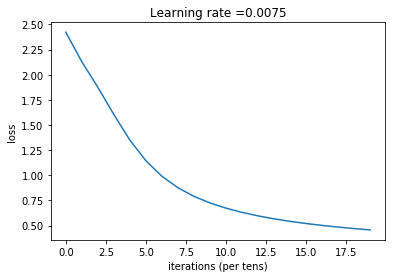

In [43]:
parameters = L_layer_model(train_set_x_new, train_set_y_new, dimensions, num_iterations = 2000, print_loss = True)

In [44]:
def predict(X, y, parameters):
    
    # Performs forward propogation using the trained parameters and calculates the accuracy
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    
    # Forward propagation
    probas, caches = L_layer_forward(X, parameters)
    
    p = np.argmax(probas, axis = 0)
    act = np.argmax(y, axis = 0)

    print("Accuracy: "  + str(np.sum((p == act)/m)))
        
    return p

Accuray we get on the training data:

In [45]:
pred_train = predict(train_set_x_new, train_set_y_new, parameters)

Accuracy: 0.8774000000000002


We get ~ 88% accuracy on the training data. Checking accuracy on test data:

In [46]:
pred_test = predict(test_set_x, test_set_y, parameters)

Accuracy: 0.8674000000000002


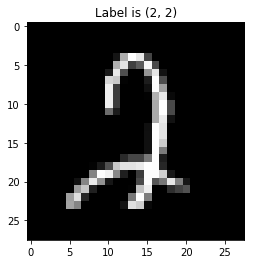

In [47]:
index  = 3474
k = test_set_x[:,index]
k = k.reshape((28, 28))
plt.title('Label is {label}'.format(label=(pred_test[index], np.argmax(test_set_y, axis = 0)[index])))
plt.imshow(k, cmap='gray')